In [51]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# LOAD THE DATASET

df = pd.read_csv(r"C:\Users\kumar\Academic_Decision_Support_System\data\synthetic\student_academic_data.csv")

df.head()


,class,stream,previous_marks,study_hours,absences,family_support,school_support,pass_fail,physics,chemistry,biology,maths,english,computer,commerce_sub,arts_sub
0,11,Arts,50,1.358103,2,0,1,0,NaN,NaN,NaN,NaN,90,NaN,NaN,39.0
1,12,Arts,82,5.834504,11,1,0,1,NaN,NaN,NaN,NaN,51,NaN,NaN,27.0
2,9,General,89,2.514990,13,0,1,1,83.0,66.0,NaN,82.0,46,73.0,NaN,NaN
3,12,Arts,36,1.437883,6,0,1,0,NaN,NaN,NaN,NaN,80,NaN,NaN,27.0
4,10,General,73,3.223473,14,0,0,1,84.0,95.0,NaN,33.0,77,26.0,NaN,NaN


In [53]:

# Dataset shape
df.shape


(5000, 16)

In [54]:

# Column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           5000 non-null   int64  
 1   stream          5000 non-null   object 
 2   previous_marks  5000 non-null   int64  
 3   study_hours     5000 non-null   float64
 4   absences        5000 non-null   int64  
 5   family_support  5000 non-null   int64  
 6   school_support  5000 non-null   int64  
 7   pass_fail       5000 non-null   int64  
 8   physics         3746 non-null   float64
 9   chemistry       3746 non-null   float64
 10  biology         623 non-null    float64
 11  maths           3759 non-null   float64
 12  english         5000 non-null   int64  
 13  computer        3759 non-null   float64
 14  commerce_sub    636 non-null    float64
 15  arts_sub        618 non-null    float64
dtypes: float64(8), int64(7), object(1)
memory usage: 625.1+ KB


In [55]:

# Summary statistics
df.describe()


,class,previous_marks,study_hours,absences,family_support,school_support,pass_fail,physics,chemistry,biology,maths,english,computer,commerce_sub,arts_sub
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3746.000000,3746.000000,623.000000,3759.000000,5000.0000,3759.000000,636.000000,618.000000
mean,10.494000,63.942200,3.185143,7.620200,0.642800,0.598400,0.724400,62.155099,62.343833,62.232745,62.363395,63.4464,62.502793,61.391509,61.067961
std,1.124374,20.209981,1.579367,4.608492,0.479222,0.490271,0.446861,21.747224,21.500155,21.308078,21.649081,21.2046,21.367970,22.460307,21.884223
min,9.000000,30.000000,0.500051,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.000000,25.0000,25.000000,25.000000,25.000000
25%,9.000000,46.000000,1.814316,4.000000,0.000000,0.000000,0.000000,44.000000,44.000000,44.000000,43.500000,45.0000,44.000000,41.000000,41.000000
50%,10.000000,64.000000,3.127929,8.000000,1.000000,1.000000,1.000000,62.000000,62.000000,62.000000,63.000000,64.0000,63.000000,60.000000,61.000000
75%,12.000000,82.000000,4.539596,12.000000,1.000000,1.000000,1.000000,81.000000,81.000000,79.500000,81.000000,82.0000,81.000000,82.000000,80.000000
max,12.000000,99.000000,5.998426,15.000000,1.000000,1.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.0000,99.000000,99.000000,99.000000


In [56]:

# Pass/Fail distribution
df['pass_fail'].value_counts()


pass_fail
1    3622
0    1378
Name: count, dtype: int64

In [57]:

# Correlation check
df.corr(numeric_only=True)


,class,previous_marks,study_hours,absences,family_support,school_support,pass_fail,physics,chemistry,biology,maths,english,computer,commerce_sub,arts_sub
class,1.000000,-0.001006,-0.023146,-0.037173,0.004560,-0.003283,0.012634,0.016718,0.009443,-0.007632,0.003544,0.070171,0.045283,0.022289,0.064226
previous_marks,-0.001006,1.000000,-0.002305,0.002013,0.002577,0.005732,0.549157,0.027342,-0.009626,0.026744,-0.001654,0.022697,-0.004761,-0.058627,0.037561
study_hours,-0.023146,-0.002305,1.000000,0.003006,0.018183,0.009855,0.273549,-0.009436,-0.003955,0.087311,0.002988,-0.012298,-0.009269,-0.011876,0.034589
absences,-0.037173,0.002013,0.003006,1.000000,0.005043,0.004282,-0.038696,-0.000264,0.000914,0.005442,-0.015330,0.016619,0.010119,0.015013,0.032210
family_support,0.004560,0.002577,0.018183,0.005043,1.000000,-0.001071,0.033422,0.017436,0.041413,0.072870,-0.009164,-0.014011,-0.001069,0.114892,0.029769
school_support,-0.003283,0.005732,0.009855,0.004282,-0.001071,1.000000,0.036154,-0.005936,0.011515,0.045890,0.024605,-0.008017,-0.020548,0.013085,0.018112
pass_fail,0.012634,0.549157,0.273549,-0.038696,0.033422,0.036154,1.000000,0.167180,0.165269,0.262809,0.164404,0.207020,0.119383,0.141840,0.405695
physics,0.016718,0.027342,-0.009436,-0.000264,0.017436,-0.005936,0.167180,1.000000,0.012247,-0.010793,-0.015213,0.000219,0.003315,NaN,NaN
chemistry,0.009443,-0.009626,-0.003955,0.000914,0.041413,0.011515,0.165269,0.012247,1.000000,0.016982,0.006946,0.031118,0.004341,NaN,NaN
biology,-0.007632,0.026744,0.087311,0.005442,0.072870,0.045890,0.262809,-0.010793,0.016982,1.000000,NaN,0.013517,NaN,NaN,NaN


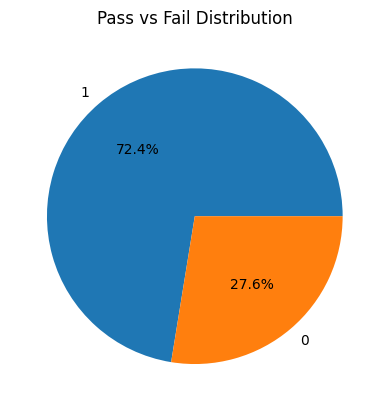

In [58]:
# PASS VS FAIL PIE CHART
df["pass_fail"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pass vs Fail Distribution")
plt.ylabel("")
plt.show()

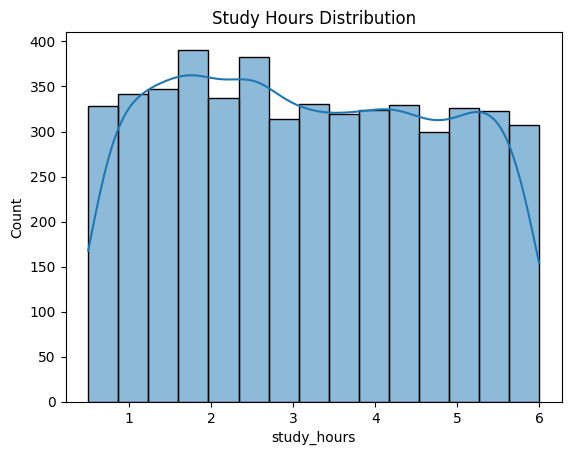

In [59]:
# DISTRIBUTION OF STUDY HOURS
sns.histplot(df["study_hours"], bins=15, kde=True)
plt.title("Study Hours Distribution")
plt.show()

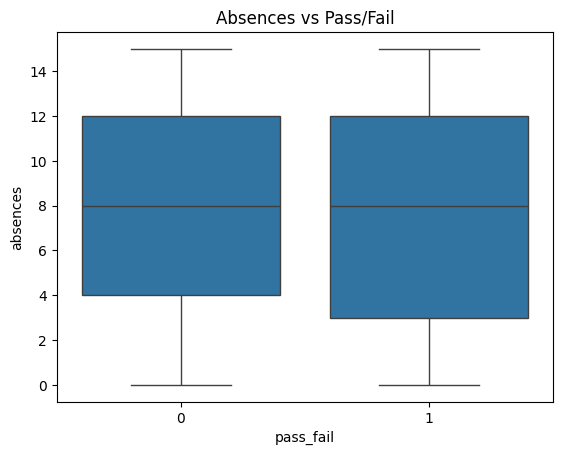

In [60]:
# ATTENDANCE VS RESULT
sns.boxplot(x="pass_fail", y="absences", data=df)
plt.title("Absences vs Pass/Fail")
plt.show()

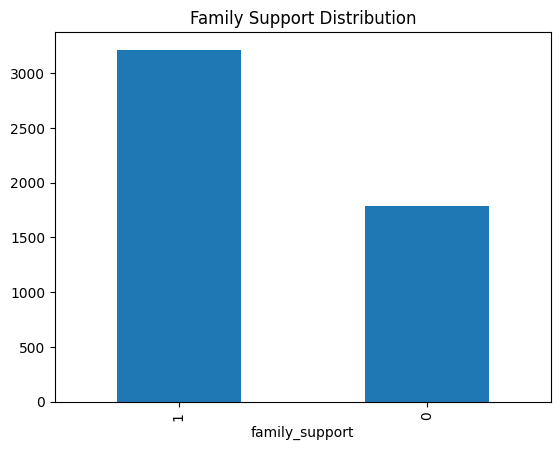

In [61]:
# SUPPORT LEVEL COUNTS
df["family_support"].value_counts().plot(kind="bar")
plt.title("Family Support Distribution")
plt.show()